In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


#### Removing day column from our data because it is irrelevant or doesnot add any value

In [5]:
df.drop(columns=['day'],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
df['outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [8]:
df['temp'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [9]:
df['humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [10]:
df['wind'].unique()

array(['Weak', 'Strong'], dtype=object)

### This is our output column. Since it has two outcomes, it is a binary classification

In [11]:
df['play'].unique()

array(['No', 'Yes'], dtype=object)

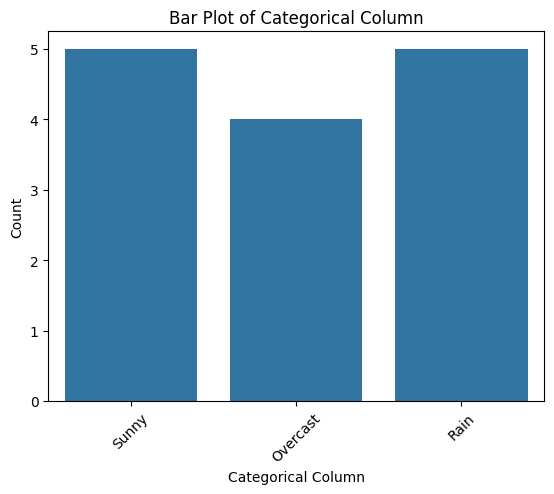

In [14]:
# Bar plot of a categorical variable
sns.countplot(x=df['outlook'], data=df)
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.title('Bar Plot of Categorical Column')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Encoding string variables to numbers

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
Num = LabelEncoder()

In [20]:
input = df.drop('play',axis='columns')
target = df['play']
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [21]:
input

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [27]:
# Encode each categorical column
for col in input:
    input[col] = Num.fit_transform(input[col])

print(input)


    outlook  temp  humidity  wind
0         2     1         0     1
1         2     1         0     0
2         0     1         0     1
3         1     2         0     1
4         1     0         1     1
5         1     0         1     0
6         0     0         1     0
7         2     2         0     1
8         2     0         1     1
9         1     2         1     1
10        2     2         1     0
11        0     2         0     0
12        0     1         1     1
13        1     2         0     0


In [28]:
input

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
classifier = GaussianNB()

In [31]:
classifier.fit(input,target)

GaussianNB()

### Prediction

In [33]:
classifier.predict([[1,0,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')